# 수집한 데이터 처리-2
## 블로그 본문내용을 분석하여 넷플릭스와 왓챠의 상위 컨텐츠 알아내기

## (python 2+ spark-2.0.0-bin-hadoop2.7)

# -------------------------------------------------------

In [1]:
import os
import sys

In [2]:
os.path.expanduser("~")

'C:\\Users\\sohyeon'

In [3]:
# 본인의 폴더 위치
os.path.join(os.path.expanduser("~"),"Downloads\spark-2.0.0-bin-hadoop2.7")

'C:\\Users\\sohyeon\\Downloads\\spark-2.0.0-bin-hadoop2.7'

In [4]:
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
# 아래 py4j 버전 확인하기
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [5]:
import findspark
findspark.init(os.path.join(os.path.expanduser("~"),"Downloads\spark-2.0.0-bin-hadoop2.7"))

In [6]:
findspark.find()

'C:\\Users\\sohyeon\\Downloads\\spark-2.0.0-bin-hadoop2.7'

In [7]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config('spark.sql.warehouse.dir','C:/Users/sohyeon')\
    .getOrCreate()

In [8]:
spark.conf.get('spark.sql.warehouse.dir')

u'C:/Users/sohyeon'

# --------------------------------------------------------

### 넷플릭스 상위 컨텐츠

In [37]:
myRdd1=spark.sparkContext.textFile("./bigData/blogdetails_netflix.json")

In [38]:
# 형태소분석기를 이용할 수도 있지만, 컨텐츠 이름이 단어로만 이루어지지않아서
# 정확한 결과를 내기 어려움(ex-루머의 루머의 루머 ->루머:일반명사, 의: 관형격 조사로 분류됨)

stopwords1=['-----','\n',u'\n',' ',u' ','\n\n',u'넷플릭스','netflix',u'오리지널',
           u'시리즈',u'드라마',u'애니메이션',u'시즌1',u'시즌2',u'시즌3',u'시즌4',
           u'유튜브',u'스트리밍',u'있습니다',u'재미있',u'다양한',u'있는데',
           u'그리고',u'그런데',u'실제로',u'그래도',u'하지만',u'때문에',
           u'있지만',u'좋아하는',u'안녕하세요',u'출연진',u'출연진들',u'배우들',u'콘텐츠',u'컨텐츠',
           u'주인공',u'주인공들',u'남자들',u'스토리',u'캐릭터',u'등장인물들',u'사람들',u'에피소드',
           u'정주행',u'이미지',u'유명한','blog.naver.com','instagram',u'크리미널',
           u'예고편',u'정주행',u'줄거리',u'포스팅',u'프로그램',u'이야기',u'스페인',
           u'정도로',u'마지막',u'갑자기',u'끝까지',u'분위기',u'루머의']

myRdd1=myRdd1.flatMap(lambda x:x.split())\
.map(lambda x:x.lower())\
.filter(lambda x:x not in stopwords1)\
.map(lambda x:x.rstrip().lstrip().rstrip('.').rstrip(',').rstrip(':').lstrip('#').
    rstrip('?').rstrip('!').rstrip('-').strip('(').strip(')').strip('<').
    strip('>').strip('[').strip(']').strip(u'ㅋ').strip(u'ㅎ').
    rstrip(u'을').rstrip(u'를').rstrip(u'은').rstrip(u'는').rstrip(u'이').
    rstrip(u'가').rstrip(u'에서').rstrip(u'에게').rstrip(u'서').rstrip(u'의').
    rstrip(u'니다').rstrip(u'이다').rstrip(u'어요'))\
.filter(lambda x:x not in stopwords1)\
.map(lambda x:x.replace(u'루머',u'루머의루머의루머').replace(u'기묘한',u'기묘한이야기').
    replace('stranger',u'기묘한이야기').replace(u'버드',u'버드박스').
    replace('raising','raising dion').replace(u'사랑했던',u'내가사랑했던모든남자들에게').
    replace(u'지정',u'지정생존자').replace(u'시에라',u'시에라연애대작전').
    replace(u'오티스',u'오티스의비밀상담소').replace(u'오렌지',u'오렌지이즈더뉴블랙').
    replace(u'오뉴블',u'오렌지이즈더뉴블랙').replace(u'나인나인',u'브루클린나인나인').
    replace(u'좋알람',u'좋아하면울리는').replace(u'동백',u'동백꽃필무렵').
    replace(u'동백꽃',u'동백꽃필무렵').replace(u'로봇',u'러브데스로봇').
    replace(u'퀴어아',u'퀴어아이').replace(u'빌어먹',u'빌어먹을세상따위').
    replace(u'바이올렛',u'바이올렛에버가든').replace(u'위기',u'위기의친구들').
    replace('elite',u'엘리트들').replace(u'종이',u'종이의집').replace('what/if',u'왓/이프').
    replace('fractured',u'프랙처드').replace('aladin',u'알라딘').replace(u'안드로이드',u'그녀,안드로이드').
    replace(u'연금술사',u'강철의연금술사').replace(u'라모나',u'오!라모나').replace(u'김씨네',u'김씨네편의점').
    replace(u'위기',u'위기의친구들').replace(u'콰이어트',u'콰이어트플레이스').replace('american',u'american son'))\
.filter(lambda x:len(x)>2)\
.map(lambda x:(x,1))\
.reduceByKey(lambda x,y:x+y)\
.map(lambda x:(x[1],x[0]))\
.sortByKey(False)

In [39]:
for i in myRdd1.take(150):
    print i[0],i[1]

301 ​​​​
127 the
87 기묘한이야기
78 ​​​
55 로맨스
54 criminal
52 내가사랑했던모든남자들에게
46 하이틴
46 엘리트들
41 아니라
40 오렌지이즈더뉴블랙
40 코미디
38 되는데
37 새로운
36 아이들
35 시작한
34 개인적으로
34 했는데
34 마일스
33 굿플레이스
33 벌어지
32 용의자
30 스릴러
30 가지고
30 봤는데
29 하는데
29 루머의루머의루머
28 굉장히
28 여배우
28 친구들
27 센티네오
27 좋아하시
27 나오는데
26 볼만한
25 평범한
25 나오고
25 and
25 영화로
25 아니고
25 things
24 장면들
24 다루고
23 재미는?​
23 갈수록
23 오스카르
22 있었던
22 2019
22 케이트
22 재밌고
21 이상한
21 제대로
21 프랑스
21 다큐멘터리
21 오티스의비밀상담소
21 여주인공
20 with
20 생각하
20 청소년
19 엄청난
19 작품들
19 같은데
19 얼마나
19 주인공인
19 보여주
19 데이트
19 돌아온
19 너무나
19 리스트
19 영화입
19 안드레
19 아버지
19 했지만
18 우연히
18 있다.​
18 신선한
18 ​넷플릭스
18 추천하
18 지금까지
18 시작했는데
18 오!라모나
18 상당히
17 인물들
17 집으로
17 좀비랜드
17 이것도
17 영화들
17 2017
17 비슷한
17 있으면
17 위기의친구들의친구들
17 알렉스
17 미스테리
17 재밌다.​
16 중인​
16 중인​​​​
16 사랑스러운
16 왓/이프
16 list
16 아내와
16 나타난
16 엄마들
16 빌어먹을세상따위
16 강철의연금술사
16 추천작
16 있다고
16 열심히
16 아네모나
16 교도소
15 아들들
15 드라마인데
15 오히려
15 보시면
15 넷플릭스추천
15 테이프
15 된다.​
15 좋아하면울리는
15 미스터리
15 일어나
15 블랙미러
15 궁금해
15 목소리
15 좋아하면
15 흥미로운
15 추천합
15 배경으로
15 있다면
15 소재로
1

In [45]:
#넷플릭스-상위 9개 컨텐츠 집계 <- 빈도수가 동일한 컨텐츠때문에 10위에서 9위로 줄임
movies1=[u'기묘한이야기','criminal',u'내가사랑했던모든남자들에게',u'엘리트들',
       u'오렌지이즈더뉴블랙',u'굿플레이스',u'루머의루머의루머',u'오티스의비밀상담소',u'오!라모나']

In [46]:
top_netflix=myRdd1.filter(lambda x:x[1] in movies1)

In [47]:
a=top_netflix.collect()
for i in a:
    print i[1],i[0]

기묘한이야기 87
criminal 54
내가사랑했던모든남자들에게 52
엘리트들 46
오렌지이즈더뉴블랙 40
굿플레이스 33
루머의루머의루머 29
오티스의비밀상담소 21
오!라모나 18


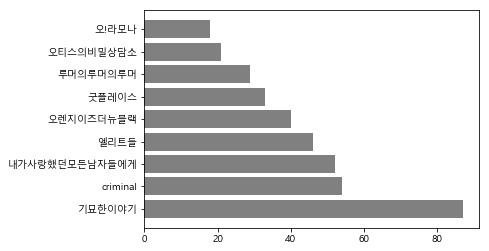

In [48]:
#넷플릭스-상위 9개 컨텐츠로만 다시 그래프 그리기

#한글깨짐을 방지하여 폰트지정
% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프
count = top_netflix.map(lambda x:x[0]).collect()
word = top_netflix.map(lambda x:x[1]).collect()
plt.barh(range(len(count)), count, color = 'grey')
plt.yticks(range(len(count)), word)
plt.show()

### 왓챠 상위 컨텐츠

In [52]:
myRdd2=spark.sparkContext.textFile("./bigData/blogdetails_watcha.json")

In [53]:
# 형태소분석기를 이용할 수도 있지만, 컨텐츠 이름이 단어로만 이루어지지않아서
# 정확한 결과를 내기 어려움(ex-루머의 루머의 루머 ->루머:일반명사, 의: 관형격 조사로 분류됨)

stopwords2=['-----','\n',u'\n',' ',u' ','\n\n',u'넷플릭스','netflix',u'오리지널',
           u'왓챠플레이',u'왓챠','watcha',u'왓챠플레',u'웨이브',
           u'시리즈',u'드라마',u'애니메이션',u'시즌1',u'시즌2',u'시즌3',u'시즌4',
           u'유튜브',u'스트리밍',u'있습니다',u'재미있',u'다양한',u'있는데',
           u'그리고',u'그런데',u'실제로',u'그래도',u'하지만',u'때문에',
           u'있지만',u'좋아하는',u'안녕하세요',u'출연진',u'출연진들',u'배우들',u'콘텐츠',u'컨텐츠',
           u'주인공',u'주인공들',u'남자들',u'스토리',u'캐릭터',u'등장인물들',u'사람들',u'에피소드',
           u'정주행',u'이미지',u'유명한','blog.naver.com','instagram',
           u'예고편',u'정주행',u'줄거리',u'포스팅',u'프로그램',u'이야기',
           u'정도로',u'마지막',u'갑자기',u'끝까지',u'분위기']

myRdd2=myRdd2.flatMap(lambda x:x.split())\
.map(lambda x:x.lower())\
.filter(lambda x:x not in stopwords2)\
.map(lambda x:x.rstrip().lstrip().rstrip('.').rstrip(',').rstrip(':').lstrip('#').
    rstrip('?').rstrip('!').rstrip('-').strip('(').strip(')').strip('<').
    strip('>').strip('[').strip(']').strip(u'ㅋ').strip(u'ㅎ').
    rstrip(u'을').rstrip(u'를').rstrip(u'은').rstrip(u'는').rstrip(u'이').
    rstrip(u'가').rstrip(u'에서').rstrip(u'에게').rstrip(u'서').rstrip(u'의').
    rstrip(u'니다').rstrip(u'이다').rstrip(u'어요'))\
.filter(lambda x:x not in stopwords2)\
.map(lambda x:x.replace(u'눈부신',u'나의눈부신친구').replace(u'이브',u'킬링이브').replace(u'애니메이션.유유백',u'유유백서')
               .replace(u'스캄',u'스캄프랑스').replace(u'라이즈',u'빅리틀라이즈')\
               .replace(u'에츠코',u'교열걸코노에츠코').replace(u'짱구',u'짱구는못말려')\
               .replace(u'위한',u'내일을위한시간').replace(u'치아문',u'치아문단순적소미호')\
               .replace(u'킬링킬링이브',u'킬링이브').replace(u'왕좌',u'왕좌의게임').replace(u'위기',u'위기의주부들'))\
.filter(lambda x:len(x)>2)\
.map(lambda x:(x,1))\
.reduceByKey(lambda x,y:x+y)\
.map(lambda x:(x[1],x[0]))\
.sortByKey(False)

In [55]:
for i in myRdd2.take(180):
    print i[0],i[1]

119 킬링이브
77 빌라넬
66 체르노빌
57 마철반
49 판타지
43 볼만한
42 왕좌의게임
41 1995년
40 1992년
38 있음.​
37 추천.왓챠
35 위기의주부들
35 리뷰.​이번화
33 ​​​
31 아이패드
31 제대로
30 유유백서
29 새로운
28 플랫폼
27 아니라
27 진진팀
25 진진과
23 영화들
23 발전소
23 15세
23 가지고
23 코미디
22 봤는데
22 샤오시
21 무제한
21 내일을위한시간
20 굿닥터
20 원자력
19 서비스
19 방사능
19 ​​​​
19 이용권
19 산드라
18 동영상
18 영화와
17 하는데
17 영화입
15 ​그리고
15 하이틴
15 콘스탄틴
15 캐롤린
15 추천하
14 2019년
14 했는데
14 image
14 사이코패스
14 외에도
14 개인적으로
14 스스로
14 엄청난
14 이것도
14 있었던
14 귀여운
13 가능한
13 얼마나
13 그대로
13 무비히어로
13 보시면
13 굉장히
12 영화추천
12 있다고
12 레가소프
12 좋아하시
12 hbo
12 좋아한
12 wcha.it
12 작품들
12 대부분
12 12세
11 바탕으로
11 있었는데
11 강력한
11 나오는데
11 보고싶
11 2017
11 완벽하
11 1986년
11 연기력
11 이용해
11 생각하
11 재미도
11 영화/드라마/애
11 초홍과
11 비슷한
11 열심히
11 당연히
11 보려고
11 시민들
10 우보숭
10 2018
10 못하고
10 있다면
10 스타일
10 보여주
10 여우주연상
10 비교적
10 것으로
10 드라마에
10 주부들
10 엉뚱한
10 로맨스
9 온라인
9 인물들
9 영화라
9 아직도
9 평범한
9 정보국
9 히어로
9 왓챠로
9 포인트
9 play.watcha.net
9 영화라고
9 다시보기
9 영광옥
9 싸이코패스
9 왓챠플레이로
9 확실히
9 친구들
9 채널명
9 되는데
9 시작한
9 우연히
9 시트콤
9 사용으로
9 피오나
9 같은데
9 사용하
9 사용할
9 추천해
9 bbc
9 소개

In [56]:
#왓챠-상위 9개 컨텐츠 집계
movies2=[u'킬링이브',u'체르노빌',u'왕좌의게임',u'위기의주부들',u'유유백서',
        u'내일을위한시간',u'굿닥터',u'콘스탄틴',u'펠리시티']

In [57]:
top_watcha=myRdd2.filter(lambda x:x[1] in movies2)

In [58]:
b=top_watcha.collect()
for i in b:
    print i[1],i[0]

킬링이브 119
체르노빌 66
왕좌의게임 42
위기의주부들 35
유유백서 30
내일을위한시간 21
굿닥터 20
콘스탄틴 15
펠리시티 8


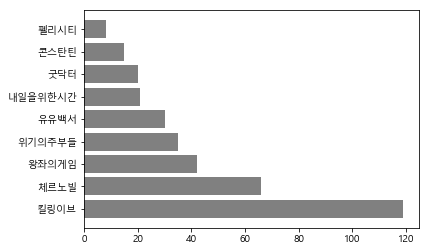

In [59]:
#왓챠-상위 10개 컨텐츠로만 다시 그래프 그리기 

#한글깨짐을 방지하여 폰트지정
% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프
count = top_watcha.map(lambda x:x[0]).collect()
word = top_watcha.map(lambda x:x[1]).collect()
plt.barh(range(len(count)), count, color = 'grey')
plt.yticks(range(len(count)), word)
plt.show()